# Checkpoint 1
---

# Base de Dados

## Base INPE
### Análise - Focos de Queimada x Supressão da vegetação nativa

In [52]:
import pandas as pd

# Substitua pelo caminho para o seu arquivo
file_path = "dashboard-fires-month-26-01-2025-22_51_22_CORRIGIDO.csv"

# Carregar o arquivo Excel
data = pd.read_csv(file_path)

# Exibir as primeiras linhas para explorar o conteúdo
print(data.head())

      date                                      class  focuses         uf
0  2020/05                       Fogo em outras áreas        1  TOCANTINS
1  2018/09  Fogo em áreas de desmatamento consolidado      554  TOCANTINS
2  2018/08          Fogo em áreas de vegetação nativa      759  TOCANTINS
3  2018/09      Fogo em áreas de desmatamento recente      299  TOCANTINS
4  2018/08                       Fogo em outras áreas        5  TOCANTINS


In [53]:
# Informações gerais sobre as colunas
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8866 entries, 0 to 8865
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     8866 non-null   object
 1   class    8866 non-null   object
 2   focuses  8866 non-null   int64 
 3   uf       8866 non-null   object
dtypes: int64(1), object(3)
memory usage: 277.2+ KB
None


In [54]:
# Verificar estatísticas descritivas
print(data.describe())

           focuses
count  8866.000000
mean    155.488044
std     463.473159
min       1.000000
25%       4.000000
50%      19.000000
75%      89.000000
max    6622.000000


C:\Users\Leandro Souza\AppData\Local\Temp\ipykernel_1672\437928461.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=focos_estado.index, y=focos_estado.values, palette="coolwarm")


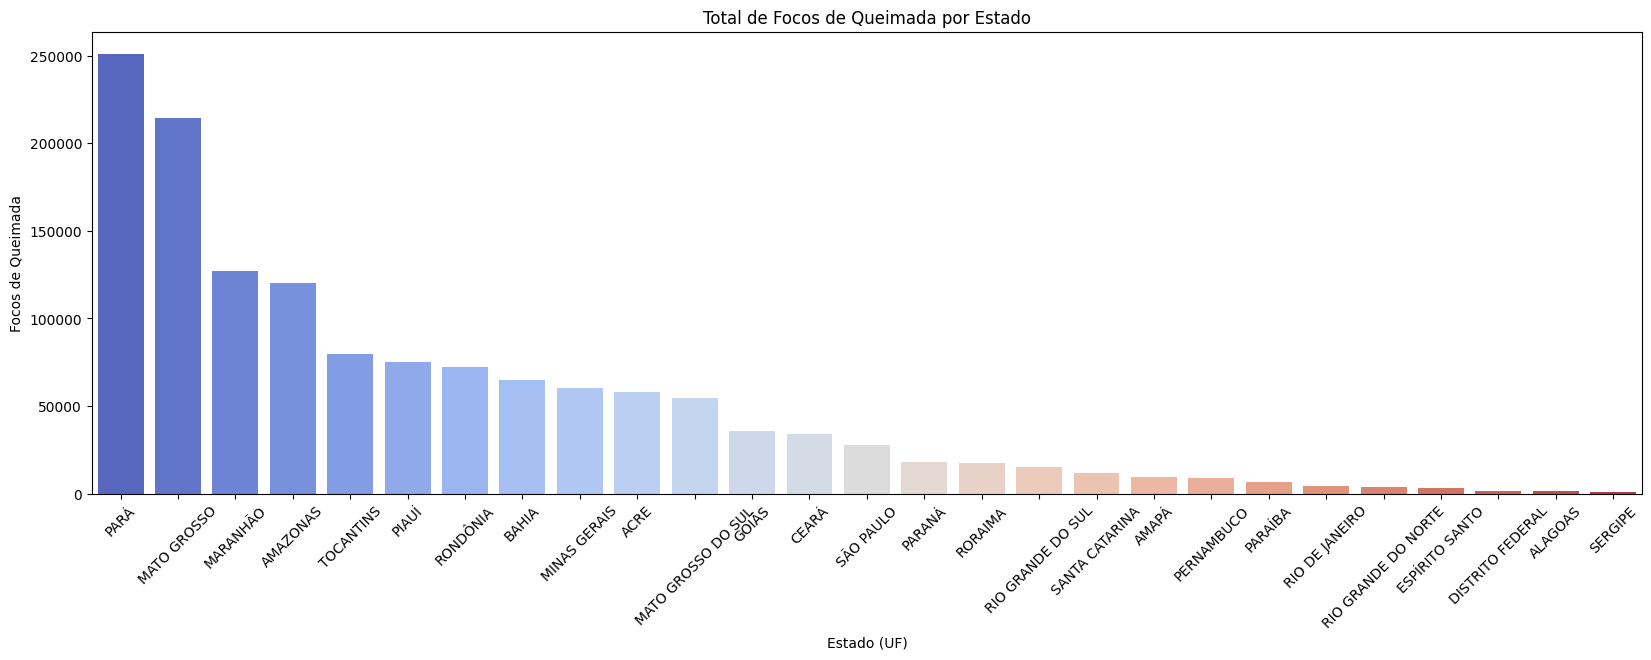

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total de focos por estado
focos_estado = data.groupby("uf")["focuses"].sum().sort_values(ascending=False)

# Plotar gráfico
plt.figure(figsize=(20, 6))
sns.barplot(x=focos_estado.index, y=focos_estado.values, palette="coolwarm")
plt.title("Total de Focos de Queimada por Estado")
plt.xlabel("Estado (UF)")
plt.ylabel("Focos de Queimada")
plt.xticks(rotation=45)
plt.show()

C:\Users\Leandro Souza\AppData\Local\Temp\ipykernel_1672\3262154933.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=focos_tipo.index, y=focos_tipo.values, palette="viridis")


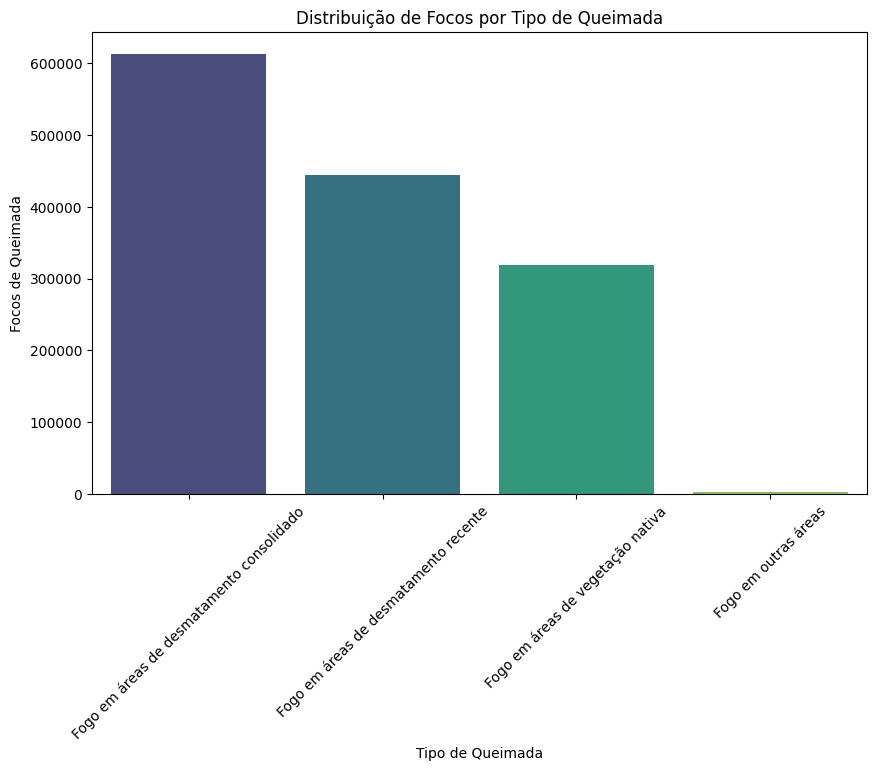

In [59]:
# Total de focos por tipo de queimada
focos_tipo = data.groupby("class")["focuses"].sum().sort_values(ascending=False)

# Plotar gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=focos_tipo.index, y=focos_tipo.values, palette="viridis")
plt.title("Distribuição de Focos por Tipo de Queimada")
plt.xlabel("Tipo de Queimada")
plt.ylabel("Focos de Queimada")
plt.xticks(rotation=45)
plt.show()

C:\Users\Leandro Souza\AppData\Local\Temp\ipykernel_1672\3956926911.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["date"] = pd.to_datetime(data["date"])


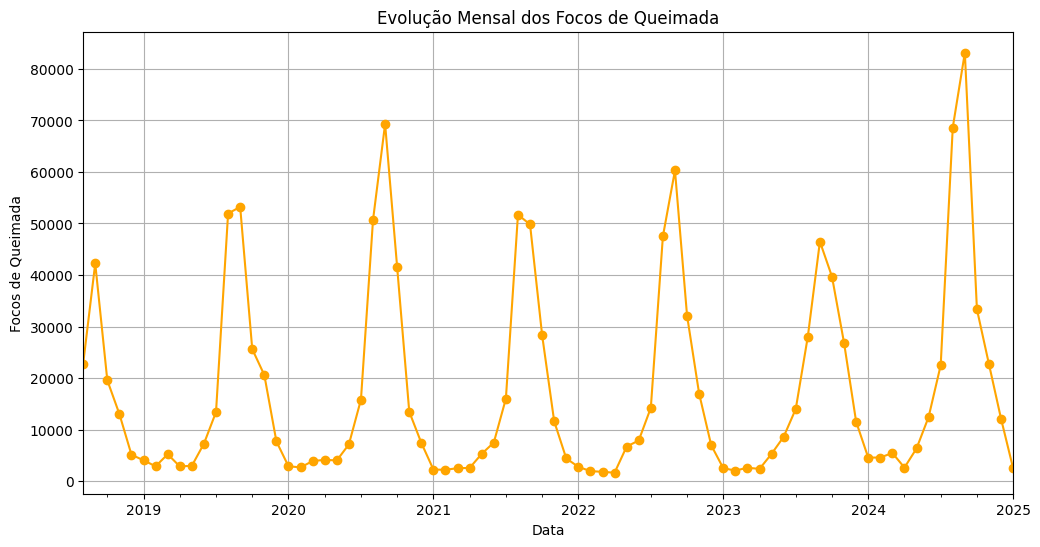

In [61]:
# Converter a coluna de data para formato datetime
data["date"] = pd.to_datetime(data["date"])

# Agrupar por mês e somar os focos
focos_tempo = data.groupby(data["date"].dt.to_period("M"))["focuses"].sum()

# Plotar série temporal
plt.figure(figsize=(12, 6))
focos_tempo.plot(kind="line", marker="o", color="orange")
plt.title("Evolução Mensal dos Focos de Queimada")
plt.xlabel("Data")
plt.ylabel("Focos de Queimada")
plt.grid()
plt.show()

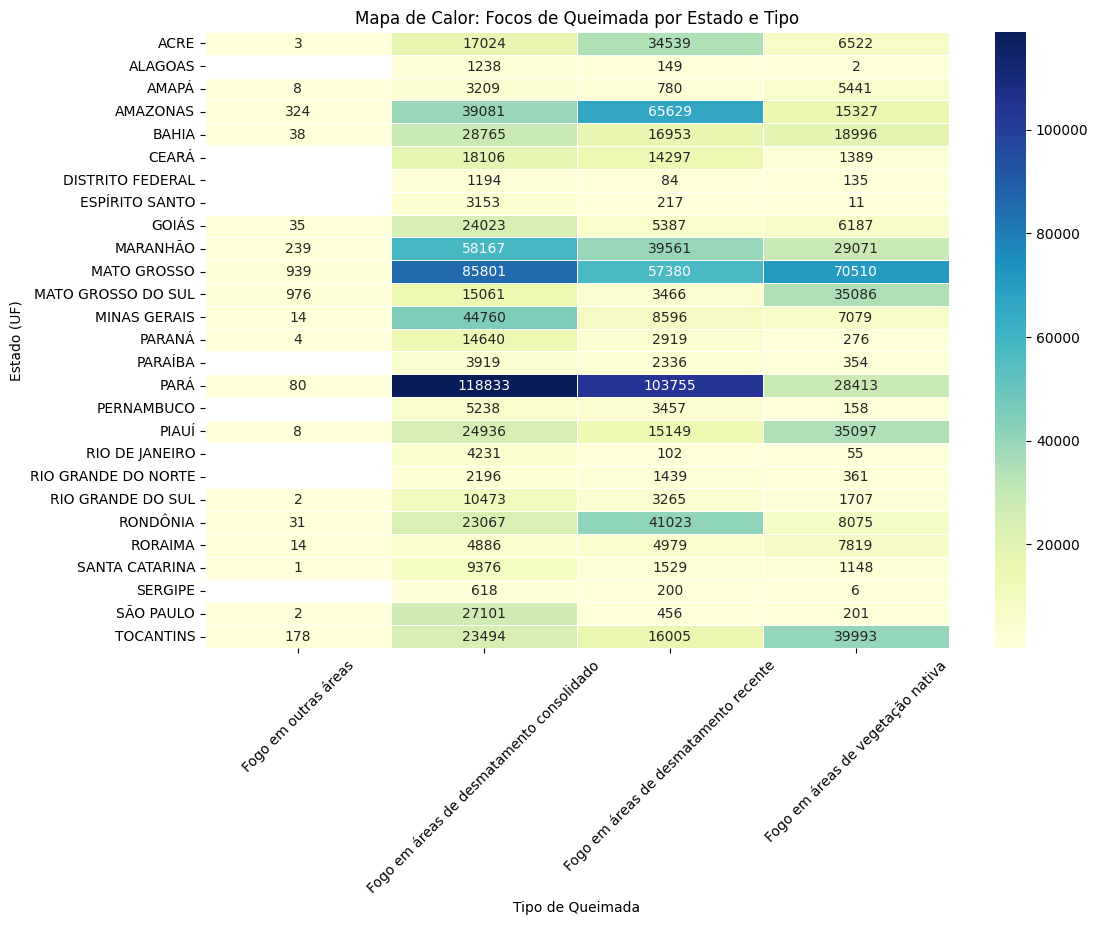

In [63]:
# Criar uma tabela dinâmica
heatmap_data = data.pivot_table(index="uf", columns="class", values="focuses", aggfunc="sum")

# Plotar mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Mapa de Calor: Focos de Queimada por Estado e Tipo")
plt.xlabel("Tipo de Queimada")
plt.xticks(rotation=45)
plt.ylabel("Estado (UF)")
plt.show()

#### Variáveis principais:


Classe: Tipo de vegetação (Primária e Secundária).

Ano: Anos de 1986 a 2023.

Desmatamento: Quantidade de desmatamento em hectares por ano para cada tipo de vegetação.

#### Características:

O desmatamento é categorizado em dois tipos de vegetação (primária e secundária), permitindo comparações entre eles.

O período de 1986 a 2023 oferece uma linha do tempo longa, permitindo observar as mudanças nas taxas de desmatamento.

A relação entre desmatamento e vegetação oferece insights sobre quais áreas são mais vulneráveis ao desmatamento.

#### Insights:

Análise de estados ou classes que têm maior incidência de queimadas. Avaliação de tendências sazonais ou regionais.

## Base SEEG
### Análise - Emissões de Gases de Efeito Estufa

In [83]:
import pandas as pd

# Substitua pelo caminho para o seu arquivo
file_path = "SEEG.csv"

# Carregar o arquivo Excel
data = pd.read_csv(file_path)

# Exibir as primeiras linhas para explorar o conteúdo
print(data.head())

      Categoria          1990          1991          1992          1993  \
0          Pará  3.713604e+08  3.456612e+08  4.887939e+08  3.903480e+08   
1   Mato Grosso  2.991454e+08  3.080704e+08  4.123194e+08  3.959249e+08   
2      Maranhão  1.551959e+08  1.437850e+08  2.037116e+08  1.642882e+08   
3  Minas Gerais  1.718919e+08  1.803260e+08  1.676099e+08  1.711714e+08   
4     São Paulo  1.188844e+08  1.254230e+08  1.220580e+08  1.254794e+08   

           1994          1995          1996          1997          1998  ...  \
0  4.096926e+08  5.709845e+08  4.608000e+08  5.624068e+08  4.809973e+08  ...   
1  5.462023e+08  6.462798e+08  5.358809e+08  5.237706e+08  5.331691e+08  ...   
2  1.526168e+08  1.432679e+08  1.394976e+08  1.288871e+08  1.897565e+08  ...   
3  1.590313e+08  1.647119e+08  1.593408e+08  1.634456e+08  1.568034e+08  ...   
4  1.377703e+08  1.401017e+08  1.388923e+08  1.400873e+08  1.409485e+08  ...   

           2014          2015          2016          2017          2

In [84]:
# Informações gerais sobre as colunas
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Categoria  28 non-null     object 
 1   1990       28 non-null     float64
 2   1991       28 non-null     float64
 3   1992       28 non-null     float64
 4   1993       28 non-null     float64
 5   1994       28 non-null     float64
 6   1995       28 non-null     float64
 7   1996       28 non-null     float64
 8   1997       28 non-null     float64
 9   1998       28 non-null     float64
 10  1999       28 non-null     float64
 11  2000       28 non-null     float64
 12  2001       28 non-null     float64
 13  2002       28 non-null     float64
 14  2003       28 non-null     float64
 15  2004       28 non-null     float64
 16  2005       28 non-null     float64
 17  2006       28 non-null     float64
 18  2007       28 non-null     float64
 19  2008       28 non-null     float64
 20  2009       2

In [85]:
# Verificar estatísticas descritivas
print(data.describe())

               1990          1991          1992          1993          1994  \
count  2.800000e+01  2.800000e+01  2.800000e+01  2.800000e+01  2.800000e+01   
mean   7.553158e+07  7.698137e+07  8.894892e+07  8.212199e+07  8.911535e+07   
std    8.994392e+07  8.792785e+07  1.174540e+08  1.027491e+08  1.238105e+08   
min    3.035022e+06  1.581342e+06  2.945904e+06  2.805204e+06  3.246562e+06   
25%    1.467818e+07  1.381961e+07  1.647843e+07  1.469508e+07  1.519463e+07   
50%    3.621994e+07  3.817298e+07  3.628183e+07  3.651667e+07  3.818994e+07   
75%    1.076038e+08  1.137593e+08  1.148660e+08  1.105780e+08  1.088965e+08   
max    3.713604e+08  3.456612e+08  4.887939e+08  3.959249e+08  5.462023e+08   

               1995          1996          1997          1998          1999  \
count  2.800000e+01  2.800000e+01  2.800000e+01  2.800000e+01  2.800000e+01   
mean   1.020657e+08  9.141269e+07  9.218887e+07  9.064879e+07  9.034949e+07   
std    1.554490e+08  1.283150e+08  1.366100e+08  1.

In [86]:
# Transpor para formato longo
data_long = data.melt(id_vars=["Categoria"], 
                      var_name="Ano", 
                      value_name="Emissao")

# Converter Ano e Emissao para tipos adequados
data_long["Ano"] = pd.to_numeric(data_long["Ano"])
data_long["Emissao"] = pd.to_numeric(data_long["Emissao"], errors="coerce")

# Verificar os primeiros registros após a transformação
print(data_long.head())

      Categoria   Ano       Emissao
0          Pará  1990  3.713604e+08
1   Mato Grosso  1990  2.991454e+08
2      Maranhão  1990  1.551959e+08
3  Minas Gerais  1990  1.718919e+08
4     São Paulo  1990  1.188844e+08


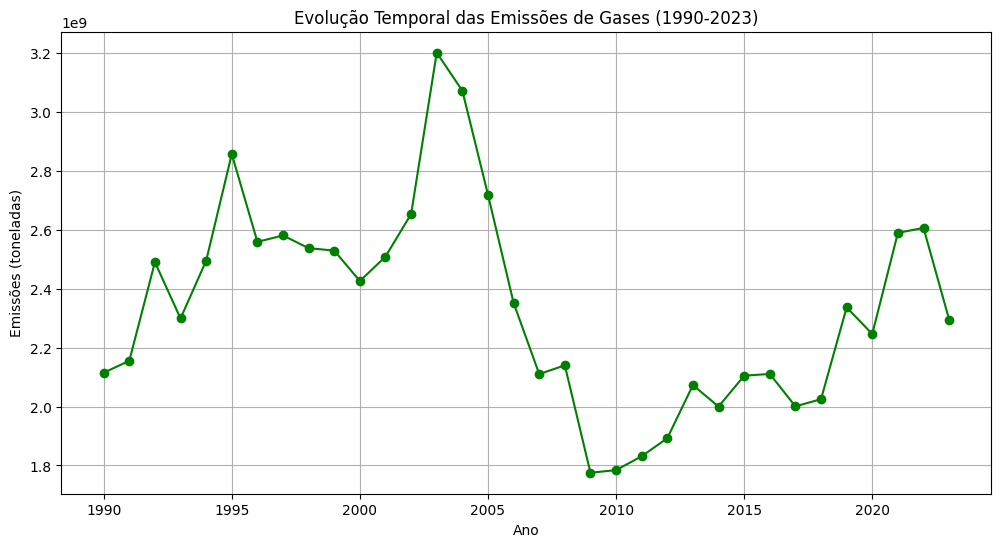

In [87]:
# Agrupar por ano e somar emissões
emissao_tempo = data_long.groupby("Ano")["Emissao"].sum()

# Plotar gráfico de linha
plt.figure(figsize=(12, 6))
emissao_tempo.plot(kind="line", marker="o", color="green")
plt.title("Evolução Temporal das Emissões de Gases (1990-2023)")
plt.xlabel("Ano")
plt.ylabel("Emissões (toneladas)")
plt.grid()
plt.show()

C:\Users\Leandro Souza\AppData\Local\Temp\ipykernel_1672\2934861351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emissao_estado.index, y=emissao_estado.values, palette="coolwarm")


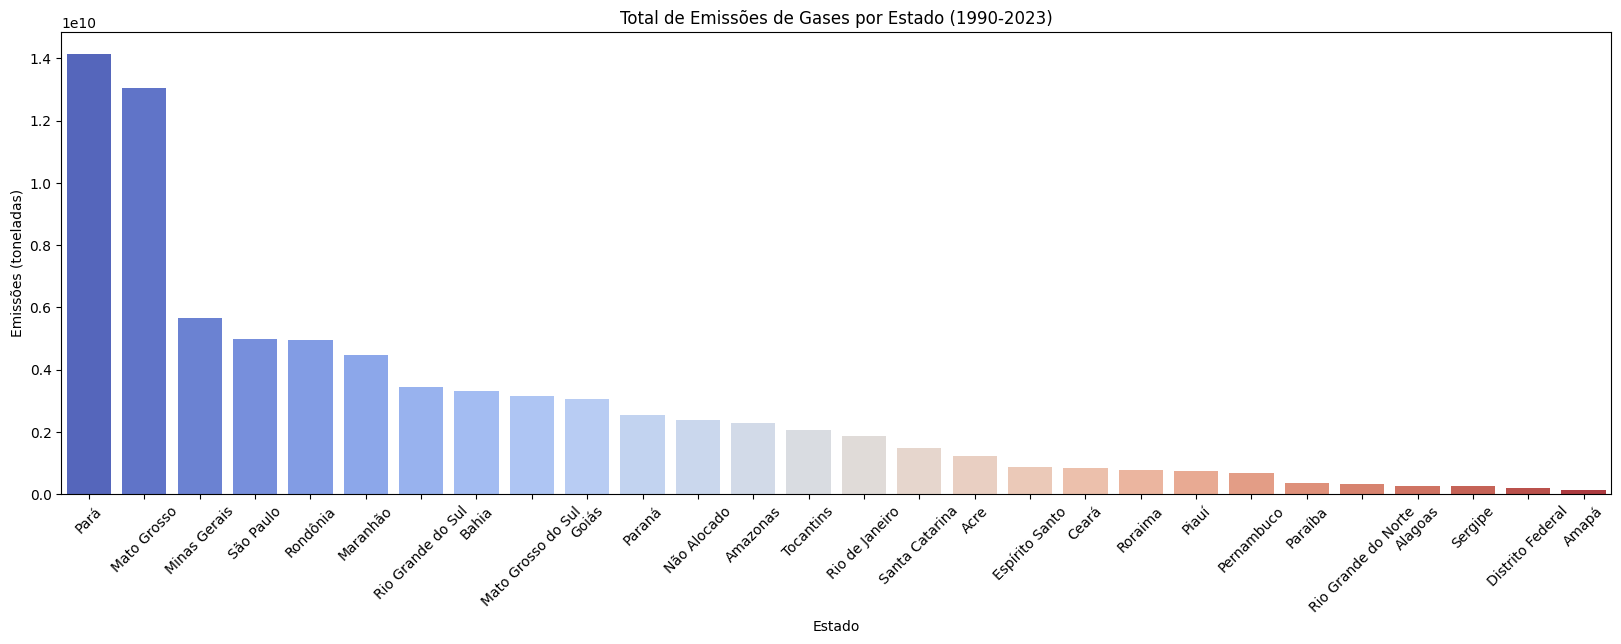

In [88]:
# Total de emissões por estado
emissao_estado = data_long.groupby("Categoria")["Emissao"].sum().sort_values(ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(20, 6))
sns.barplot(x=emissao_estado.index, y=emissao_estado.values, palette="coolwarm")
plt.title("Total de Emissões de Gases por Estado (1990-2023)")
plt.xlabel("Estado")
plt.ylabel("Emissões (toneladas)")
plt.xticks(rotation=45)
plt.show()

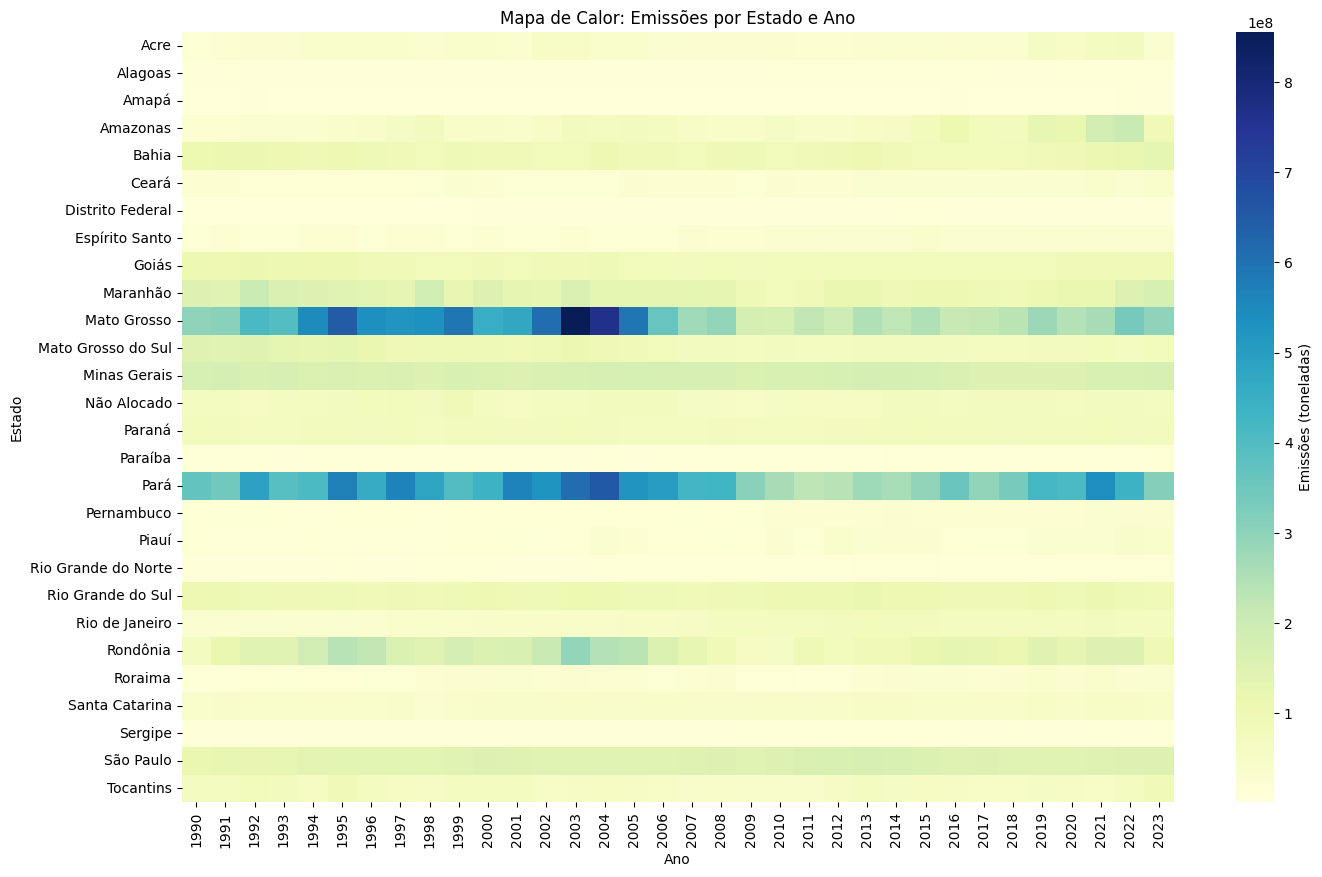

In [89]:
# Criar tabela dinâmica
heatmap_data = data_long.pivot_table(index="Categoria", columns="Ano", values="Emissao", aggfunc="sum")

# Plotar mapa de calor
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, cbar_kws={"label": "Emissões (toneladas)"})
plt.title("Mapa de Calor: Emissões por Estado e Ano")
plt.xlabel("Ano")
plt.ylabel("Estado")
plt.show()

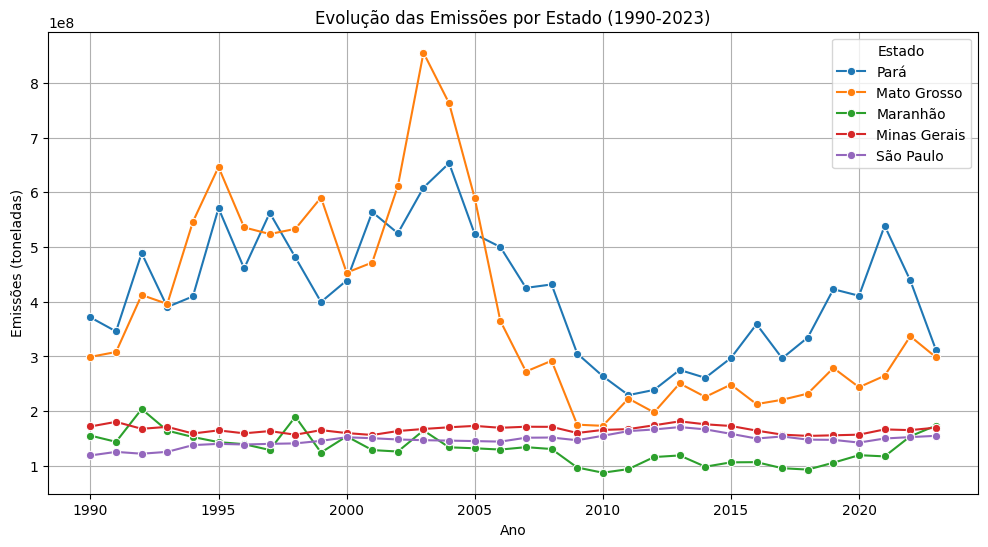

In [90]:
# Selecionar estados específicos
estados_selecionados = data_long[data_long["Categoria"].isin(["Pará", "Mato Grosso", "Maranhão", "Minas Gerais", "São Paulo"])]

# Plotar série temporal por estado
plt.figure(figsize=(12, 6))
sns.lineplot(data=estados_selecionados, x="Ano", y="Emissao", hue="Categoria", marker="o")
plt.title("Evolução das Emissões por Estado (1990-2023)")
plt.xlabel("Ano")
plt.ylabel("Emissões (toneladas)")
plt.grid()
plt.legend(title="Estado")
plt.show()

#### Variáveis principais:

Categoria: Estado (UF).

Ano: Anos de 1990 a 2023.

Emissões de GEE: Valores de emissão de gases de efeito estufa para cada estado por ano.

#### Características:

A emissão de GEE por estado é uma variável contínua que permite comparar os níveis de emissão entre os estados.

O período de 1990 a 2023 também é longo, permitindo observar tendências e mudanças nas emissões ao longo dos anos.

Pode ser interessante correlacionar os dados de emissões com as taxas de desmatamento, já que a queimada e o desmatamento impactam diretamente nas emissões de GEE.

#### Insights:

Identificar os estados com maiores contribuições para as emissões totais. Analisar o impacto de políticas ambientais ao longo dos anos. Cruzar os dados com outras bases (e.g., desmatamento ou queimadas) para encontrar relações causais.

## Base MapBiomas
### Análise - Desmatamento no Brasil

In [111]:
import pandas as pd

# Substitua pelo caminho para o seu arquivo
file_path = "MapBiomas-Tabela_de_Dados.csv"

# Carregar o arquivo Excel
data = pd.read_csv(file_path)

# Exibir as primeiras linhas para explorar o conteúdo
print(data.head())

                                 Classe  1986       1987       1988     1989  \
0    1. Supressão de Vegetação Primária   NaN  7308931.0  6432726.0  5749646   
1  2. Supressão de Vegetação Secundária   NaN        NaN        NaN   112426   

      1990     1991     1992     1993     1994  ...     2014     2015  \
0  4921199  4792157  5116605  4571184  4867557  ...  2329397  2437064   
1   206150   379203   616211   706388   808803  ...  1424841  1478782   

      2016     2017     2018     2019     2020     2021     2022     2023  
0  2365136  2141748  2259905  2985170  2941241  3409599  3608005  2480731  
1  1472338  1342547  1453311  1588832  1511754  1655177  1934253   957946  

[2 rows x 39 columns]


In [112]:
# Informações gerais sobre as colunas
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Classe  2 non-null      object 
 1   1986    0 non-null      float64
 2   1987    1 non-null      float64
 3   1988    1 non-null      float64
 4   1989    2 non-null      int64  
 5   1990    2 non-null      int64  
 6   1991    2 non-null      int64  
 7   1992    2 non-null      int64  
 8   1993    2 non-null      int64  
 9   1994    2 non-null      int64  
 10  1995    2 non-null      int64  
 11  1996    2 non-null      int64  
 12  1997    2 non-null      int64  
 13  1998    2 non-null      int64  
 14  1999    2 non-null      int64  
 15  2000    2 non-null      int64  
 16  2001    2 non-null      int64  
 17  2002    2 non-null      int64  
 18  2003    2 non-null      int64  
 19  2004    2 non-null      int64  
 20  2005    2 non-null      int64  
 21  2006    2 non-null      int64  
 22  2007  

In [113]:
# Verificar estatísticas descritivas
print(data.describe())

       1986       1987       1988          1989          1990          1991  \
count   0.0        1.0        1.0  2.000000e+00  2.000000e+00  2.000000e+00   
mean    NaN  7308931.0  6432726.0  2.931036e+06  2.563674e+06  2.585680e+06   
std     NaN        NaN        NaN  3.986116e+06  3.334043e+06  3.120430e+06   
min     NaN  7308931.0  6432726.0  1.124260e+05  2.061500e+05  3.792030e+05   
25%     NaN  7308931.0  6432726.0  1.521731e+06  1.384912e+06  1.482442e+06   
50%     NaN  7308931.0  6432726.0  2.931036e+06  2.563674e+06  2.585680e+06   
75%     NaN  7308931.0  6432726.0  4.340341e+06  3.742437e+06  3.688918e+06   
max     NaN  7308931.0  6432726.0  5.749646e+06  4.921199e+06  4.792157e+06   

               1992          1993          1994          1995  ...  \
count  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  ...   
mean   2.866408e+06  2.638786e+06  2.838180e+06  3.186965e+06  ...   
std    3.182259e+06  2.732823e+06  2.869972e+06  3.112413e+06  ...   
min    6

In [116]:
# Transpor para formato longo (Ano e Desmatamento como variáveis)
data_long = data.melt(id_vars=["Classe"], 
                      var_name="Ano", 
                      value_name="Desmatamento")

# Converter Ano e Desmatamento para tipos adequados
data_long["Ano"] = pd.to_numeric(data_long["Ano"])
data_long["Desmatamento"] = pd.to_numeric(data_long["Desmatamento"], errors="coerce")

# Verificar os primeiros registros após a transformação
print(data_long.head())

                                 Classe   Ano  Desmatamento
0    1. Supressão de Vegetação Primária  1986           NaN
1  2. Supressão de Vegetação Secundária  1986           NaN
2    1. Supressão de Vegetação Primária  1987     7308931.0
3  2. Supressão de Vegetação Secundária  1987           NaN
4    1. Supressão de Vegetação Primária  1988     6432726.0


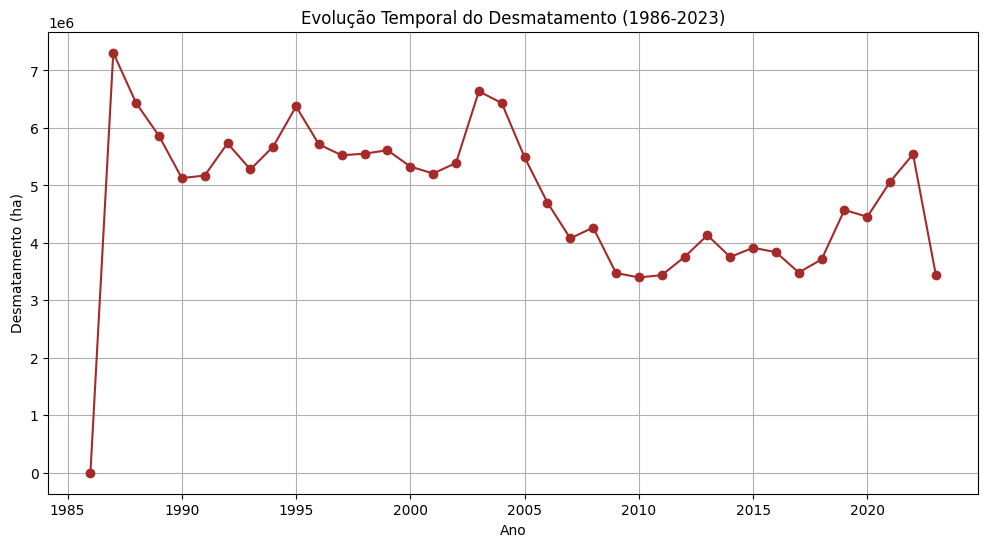

In [117]:
# Agrupar por ano e somar desmatamento total
desmatamento_tempo = data_long.groupby("Ano")["Desmatamento"].sum()

# Plotar gráfico de linha
plt.figure(figsize=(12, 6))
desmatamento_tempo.plot(kind="line", marker="o", color="brown")
plt.title("Evolução Temporal do Desmatamento (1986-2023)")
plt.xlabel("Ano")
plt.ylabel("Desmatamento (ha)")
plt.grid()
plt.show()


C:\Users\Leandro Souza\AppData\Local\Temp\ipykernel_1672\3875321600.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=desmatamento_classe.index, y=desmatamento_classe.values, palette="Set2")


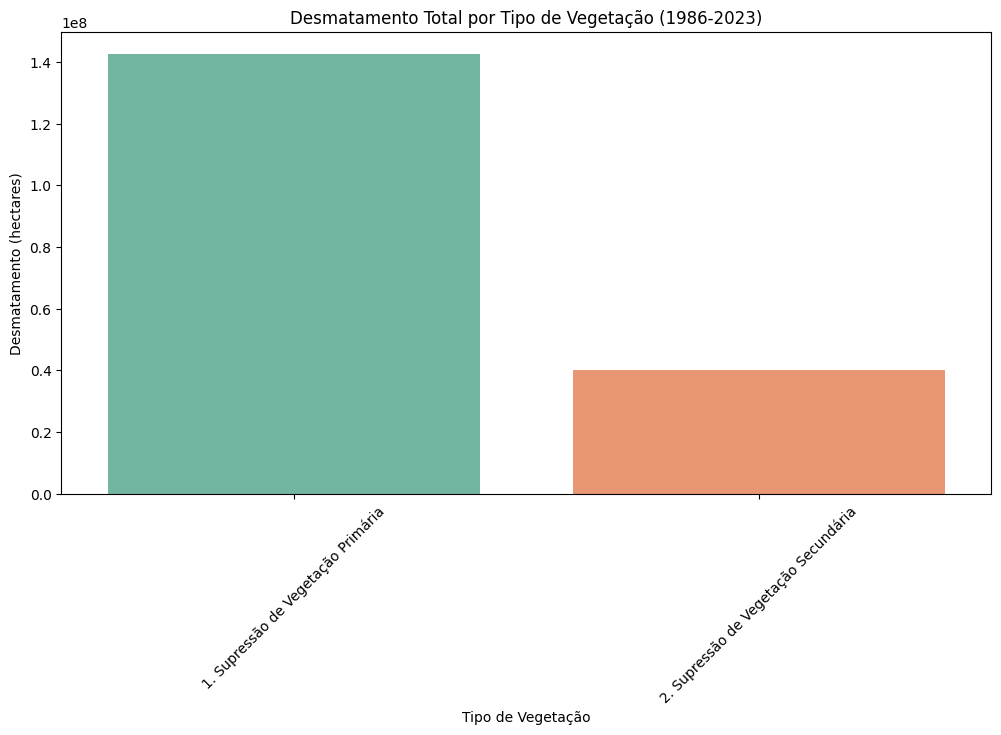

In [118]:
# Agrupar por tipo de vegetação e somar o desmatamento
desmatamento_classe = data_long.groupby("Classe")["Desmatamento"].sum().sort_values(ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=desmatamento_classe.index, y=desmatamento_classe.values, palette="Set2")
plt.title("Desmatamento Total por Tipo de Vegetação (1986-2023)")
plt.xlabel("Tipo de Vegetação")
plt.ylabel("Desmatamento (hectares)")
plt.xticks(rotation=45)
plt.show()

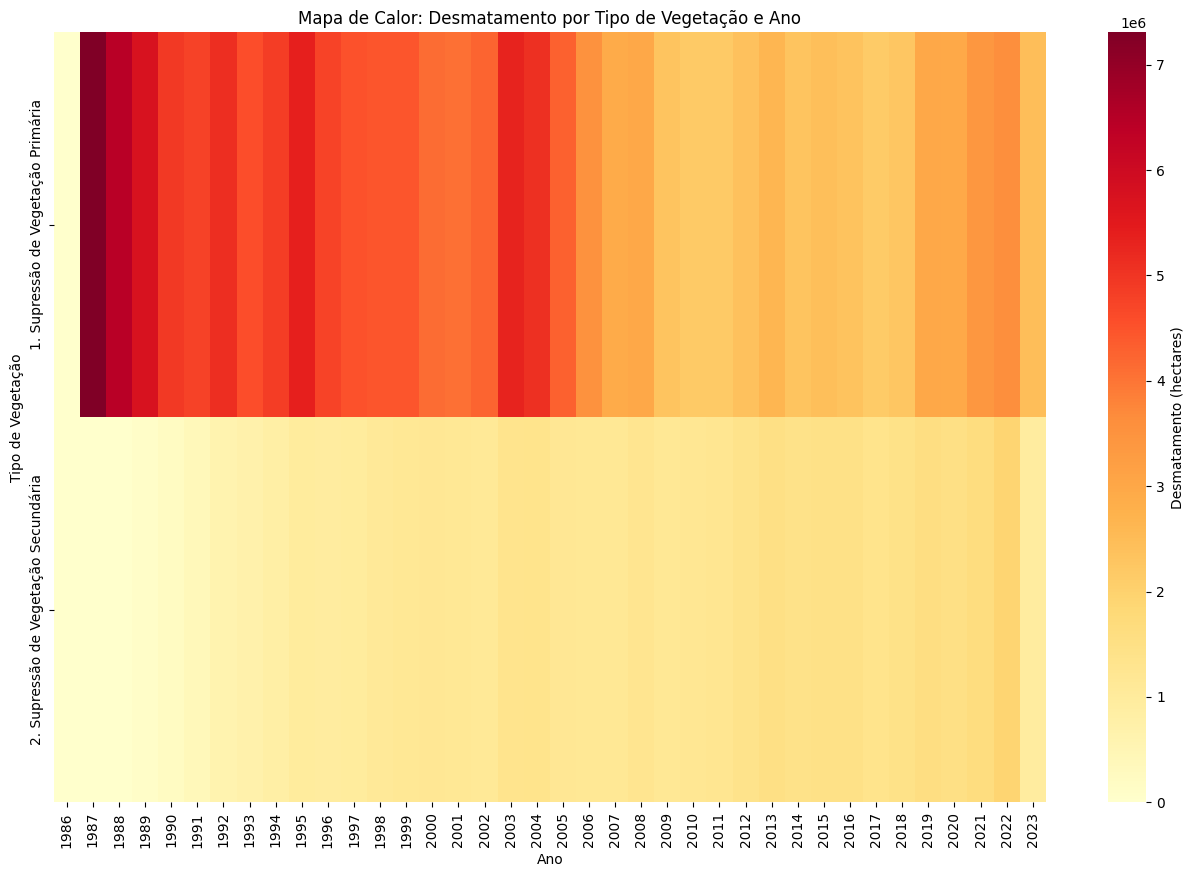

In [119]:
# Criar tabela dinâmica com desmatamento por ano e tipo de vegetação
heatmap_data = data_long.pivot_table(index="Classe", columns="Ano", values="Desmatamento", aggfunc="sum")

# Plotar mapa de calor
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=False, cbar_kws={"label": "Desmatamento (hectares)"})
plt.title("Mapa de Calor: Desmatamento por Tipo de Vegetação e Ano")
plt.xlabel("Ano")
plt.ylabel("Tipo de Vegetação")
plt.show()

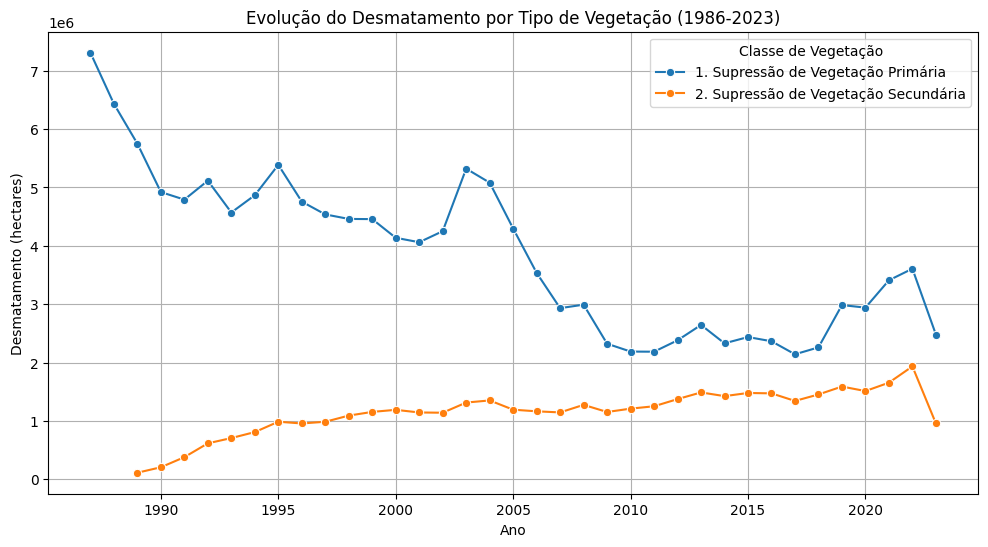

In [121]:
# Selecionar dados para vegetação primária e secundária
desmatamento_primaria_secundaria = data_long[data_long["Classe"].isin(["1. Supressão de Vegetação Primária", "2. Supressão de Vegetação Secundária"])]

# Plotar série temporal do desmatamento para primária e secundária
plt.figure(figsize=(12, 6))
sns.lineplot(data=desmatamento_primaria_secundaria, x="Ano", y="Desmatamento", hue="Classe", marker="o")
plt.title("Evolução do Desmatamento por Tipo de Vegetação (1986-2023)")
plt.xlabel("Ano")
plt.ylabel("Desmatamento (hectares)")
plt.grid()
plt.legend(title="Classe de Vegetação")
plt.show()

#### Variáveis principais:

Data: Ano e mês da ocorrência das queimadas.

Class: Tipo de queimada (por exemplo, florestal, agrícola).

Focuses: Número de focos de queimada por tipo.

UF: Unidade Federativa (estado).

#### Características:

A variável "Focos" fornece a quantidade de focos de incêndio, uma métrica importante para medir o impacto das queimadas.

A variável "Class" permite identificar os tipos de incêndios (florestais ou agrícolas), o que pode ajudar a analisar a origem das queimadas.

A dimensão temporal das queimadas (ano e mês) é importante para detectar tendências sazonais.

#### Insights:

Identificação de períodos críticos de desmatamento para cada tipo de vegetação. Avaliação da contribuição relativa do desmatamento de vegetação primária e secundária. Analisar se houve alguma redução ou aumento no desmatamento devido a mudanças nas políticas de conservação ou queimadas.

# Estudo das bases

## Cruzamento de Bases

#### Essas bases podem ser analisadas juntas devido às seguintes características comuns:

Dimensão Temporal: Duas das três bases têm um período que se estende entre 1990 e 2023 (MapBiomas de 1986 a 2023, mas podemos considerar a parte comum de 1990-2023). Isso permite observar a evolução das variáveis ao longo do tempo.

Dimensão Geográfica (Estado/UF): Tanto o SEEG quanto as Queimadas possuem a variável UF, o que permite cruzar os dados geograficamente e analisar como diferentes estados impactam os resultados.

Relações Ambientais: O desmatamento e as queimadas estão diretamente relacionados à emissão de gases de efeito estufa. Portanto, podemos investigar como as variáveis de desmatamento e queimadas afetam as emissões de gases de efeito estufa nos estados.

## Perguntas e Objetivos

#### Qual é a correlação entre o desmatamento e a quantidade de focos de queimadas em cada estado ao longo dos anos?

Essa pergunta ajudaria a entender se um aumento no desmatamento está associado ao aumento das queimadas, o que é importante para políticas de controle de incêndios e desmatamento.

#### Como as emissões de gases de efeito estufa (GEE) estão relacionadas ao desmatamento e às queimadas por estado?

Isso permitiria identificar os estados que mais contribuem para as emissões de GEE devido ao desmatamento e queimadas, ajudando a priorizar ações em locais críticos.

####  Quais estados apresentam os maiores aumentos em desmatamento e queimadas ao longo do tempo, e como isso impacta suas emissões de GEE?

Uma análise temporal ajudaria a identificar tendências preocupantes e fornecer insights para ações preventivas ou corretivas.

####  Quais anos tiveram os maiores picos de desmatamento e queimadas e qual foi o impacto nas emissões de GEE?

Analisando os anos críticos, seria possível entender o impacto dessas crises ambientais nas emissões, ajudando a formar políticas de controle.

## Machine Learning

Usar algum algoritmo temporal. Exemplo: Heaman (SKLearn) -> Sugestão da professora.

Posso usar o Fluxograma do SKLearn para chegar no algortimo adequado.

Verificar se consigo recorte por estado na base de dados do desmatamento.

Posso ver dados discrepantes e correlacionar com notícias da época.

# Checkpoint 2
---

# Estudo das variáveis

## Objetivo

Analisar a relação entre desmatamento, focos de queimada e emissões de CO2 nos estados do Brasil. Fazer o uso modelos de machine learning para prever emissões de CO2 com base nas outras variáveis.

## Pré-processamento dos Dados

### Queimadas

In [42]:
import pandas as pd

# Carregar os dados de focos de queimadas
file_path_queimadas = "dashboard-fires-month-26-01-2025-22_51_22_CORRIGIDO.csv"
queimadas = pd.read_csv(file_path_queimadas)

# Converter a coluna 'date' para datetime
queimadas['date'] = pd.to_datetime(queimadas['date'])

# Extrair o ano da data
queimadas['ano'] = queimadas['date'].dt.year

# Agregar os dados por estado e ano
queimadas_agregadas = queimadas.groupby(['uf', 'ano'])['focuses'].sum().reset_index()

print(queimadas_agregadas.head())

     uf   ano  focuses
0  ACRE  2018     6181
1  ACRE  2019     6800
2  ACRE  2020     9191
3  ACRE  2021     8827
4  ACRE  2022    11835


C:\Users\Leandro Souza\AppData\Local\Temp\ipykernel_15676\3336080104.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  queimadas['date'] = pd.to_datetime(queimadas['date'])


### Emissões de GEE

In [5]:
# Carregar os dados de emissões de gases
file_path_emissoes = "SEEG.csv"
emissoes = pd.read_csv(file_path_emissoes)

# Reorganizar os dados de emissões para um formato longo
emissoes_long = emissoes.melt(id_vars='Categoria', var_name='ano', value_name='emissoes_co2')

# Renomear a coluna 'categoria' para 'uf' (assumindo que 'categoria' é o estado)
emissoes_long.rename(columns={'Categoria': 'uf'}, inplace=True)

# Converter a coluna 'ano' para inteiro
emissoes_long['ano'] = emissoes_long['ano'].astype(int)

print(emissoes_long.head())

             uf   ano  emissoes_co2
0          Pará  1990  3.713604e+08
1   Mato Grosso  1990  2.991454e+08
2      Maranhão  1990  1.551959e+08
3  Minas Gerais  1990  1.718919e+08
4     São Paulo  1990  1.188844e+08


### Desmatamento

In [7]:
# Carregar os dados de desmatamento
file_path_desmatamento = "MapBiomas-Tabela_de_Dados.csv"
desmatamento = pd.read_csv(file_path_desmatamento)

# Filtrar apenas as linhas de "supressão de vegetação primária" e "secundária"
desmatamento = desmatamento[desmatamento['Classe'].isin(['1. Supressão de Vegetação Primária', '2. Supressão de Vegetação Secundária'])]

# Agregar os valores de desmatamento (primário + secundário) por ano
desmatamento_agregado = desmatamento.drop('Classe', axis=1).sum().reset_index()
desmatamento_agregado.columns = ['ano', 'desmatamento']

# Converter a coluna 'ano' para inteiro
desmatamento_agregado['ano'] = desmatamento_agregado['ano'].astype(int)

print(desmatamento_agregado.head())

    ano  desmatamento
0  1986           0.0
1  1987     7308931.0
2  1988     6432726.0
3  1989     5862072.0
4  1990     5127349.0


### Ajustando os nomes dos estados das bases de dados

In [43]:
# Função para padronizar os nomes dos estados
def padronizar_estado(nome):
    # Dividir o nome por espaços, capitalizar cada parte e juntar novamente
    return ' '.join([parte.capitalize() for parte in nome.split()])

# Aplicar a função de padronização
queimadas_agregadas['uf'] = queimadas_agregadas['uf'].apply(padronizar_estado)
emissoes_long['uf'] = emissoes_long['uf'].apply(padronizar_estado)

# Verificar novamente os nomes dos estados
print("Estados na base de focos de queimadas após padronização:")
print(queimadas_agregadas['uf'].unique())

print("\nEstados na base de emissões de gases após padronização:")
print(emissoes_long['uf'].unique())

Estados na base de focos de queimadas após padronização:
['Acre' 'Alagoas' 'Amapá' 'Amazonas' 'Bahia' 'Ceará' 'Distrito Federal'
 'Espírito Santo' 'Goiás' 'Maranhão' 'Mato Grosso' 'Mato Grosso Do Sul'
 'Minas Gerais' 'Paraná' 'Paraíba' 'Pará' 'Pernambuco' 'Piauí'
 'Rio De Janeiro' 'Rio Grande Do Norte' 'Rio Grande Do Sul' 'Rondônia'
 'Roraima' 'Santa Catarina' 'Sergipe' 'São Paulo' 'Tocantins']

Estados na base de emissões de gases após padronização:
['Pará' 'Mato Grosso' 'Maranhão' 'Minas Gerais' 'São Paulo' 'Bahia'
 'Rondônia' 'Amazonas' 'Goiás' 'Tocantins' 'Rio Grande Do Sul'
 'Mato Grosso Do Sul' 'Paraná' 'Não Alocado' 'Rio De Janeiro'
 'Santa Catarina' 'Piauí' 'Ceará' 'Acre' 'Espírito Santo' 'Roraima'
 'Pernambuco' 'Paraíba' 'Rio Grande Do Norte' 'Alagoas' 'Sergipe'
 'Distrito Federal' 'Amapá']


## Combinação de Dados

In [78]:
# Primeiro, combinar os dados de queimadas e emissões por estado e ano
dados_combinados = pd.merge(queimadas_agregadas, emissoes_long, on=['uf', 'ano'], how='inner')

# Agora, adicionar os dados de desmatamento (nível nacional)
dados_combinados = pd.merge(dados_combinados, desmatamento_agregado, on='ano', how='left')

# Verificar o DataFrame combinado
print(dados_combinados.head(20))

          uf   ano  focuses  emissoes_co2  desmatamento
0       Acre  2018     6181  3.475404e+07     3713216.0
1       Acre  2019     6800  6.092933e+07     4574002.0
2       Acre  2020     9191  5.393308e+07     4452995.0
3       Acre  2021     8827  6.562221e+07     5064776.0
4       Acre  2022    11835  7.401285e+07     5542258.0
5       Acre  2023     6562  2.961577e+07     3438677.0
6    Alagoas  2018      147  7.998006e+06     3713216.0
7    Alagoas  2019      232  8.191827e+06     4574002.0
8    Alagoas  2020      159  8.635575e+06     4452995.0
9    Alagoas  2021      173  9.517385e+06     5064776.0
10   Alagoas  2022      140  9.291423e+06     5542258.0
11   Alagoas  2023      227  1.050894e+07     3438677.0
12     Amapá  2018     1180  3.271708e+06     3713216.0
13     Amapá  2019     1275  3.652935e+06     4574002.0
14     Amapá  2020      750  2.770262e+06     4452995.0
15     Amapá  2021      676  2.578994e+06     5064776.0
16     Amapá  2022      988  1.092942e+07     55

### Padronizando em nível nacional

In [81]:
# Dados de desmatamento (nível nacional)
desmatamento_agregado = desmatamento_agregado.rename(columns={'ano': 'ano', 'desmatamento': 'desmatamento'})

# Dados de focos de queimada e emissões de CO2 (nível estadual)
dados_estaduais = pd.merge(queimadas_agregadas, emissoes_long, on=['uf', 'ano'], how='inner')

# Agregar os dados estaduais por ano (somando os valores de todos os estados)
dados_nacionais = dados_estaduais.groupby('ano').agg({
    'focuses': 'sum',
    'emissoes_co2': 'sum'
}).reset_index()

# Combinar os dados nacionais com o desmatamento
dados_combinados_nacional = pd.merge(dados_nacionais, desmatamento_agregado, on='ano', how='inner')

print(dados_combinados_nacional.head(10))

    ano  focuses  emissoes_co2  desmatamento
0  2018   102715  1.950368e+09     3713216.0
1  2019   197618  2.261958e+09     4574002.0
2  2020   222780  2.176694e+09     4452995.0
3  2021   184071  2.516309e+09     5064776.0
4  2022   200748  2.535026e+09     5542258.0
5  2023   189892  2.225653e+09     3438677.0


## Análise Exploratória de Dados (EDA)

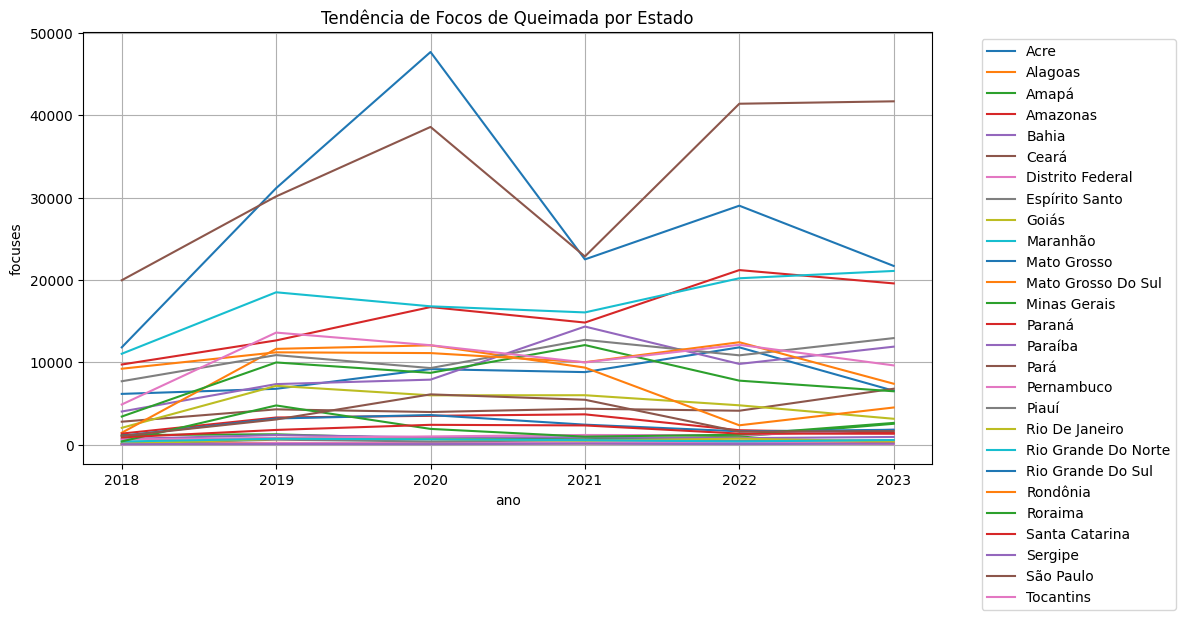

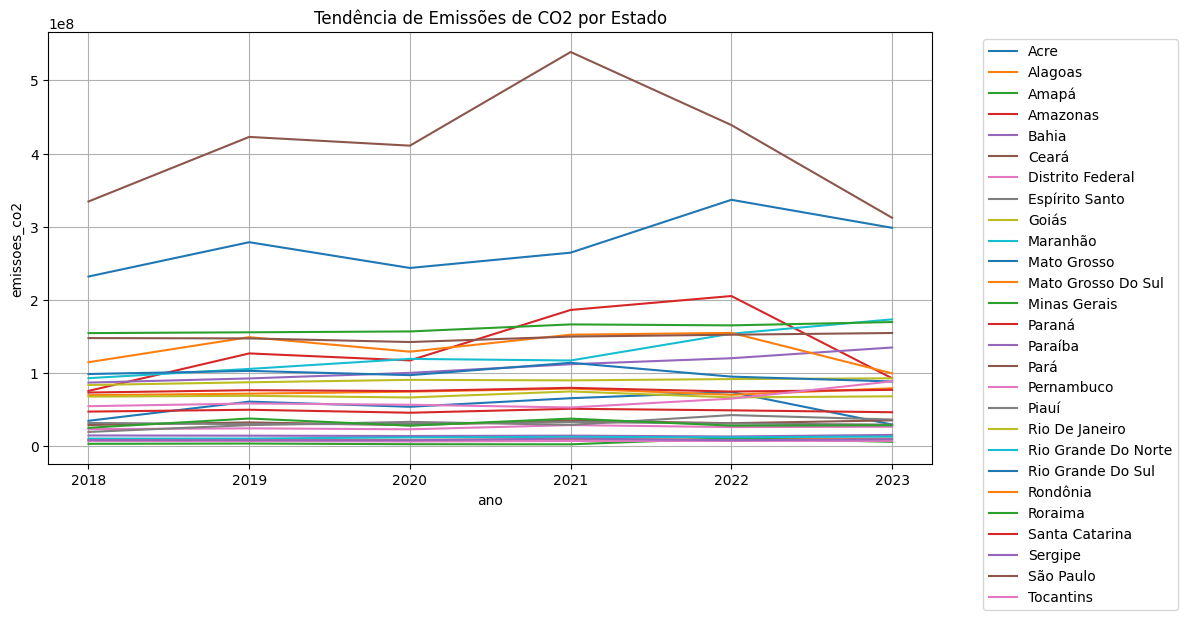

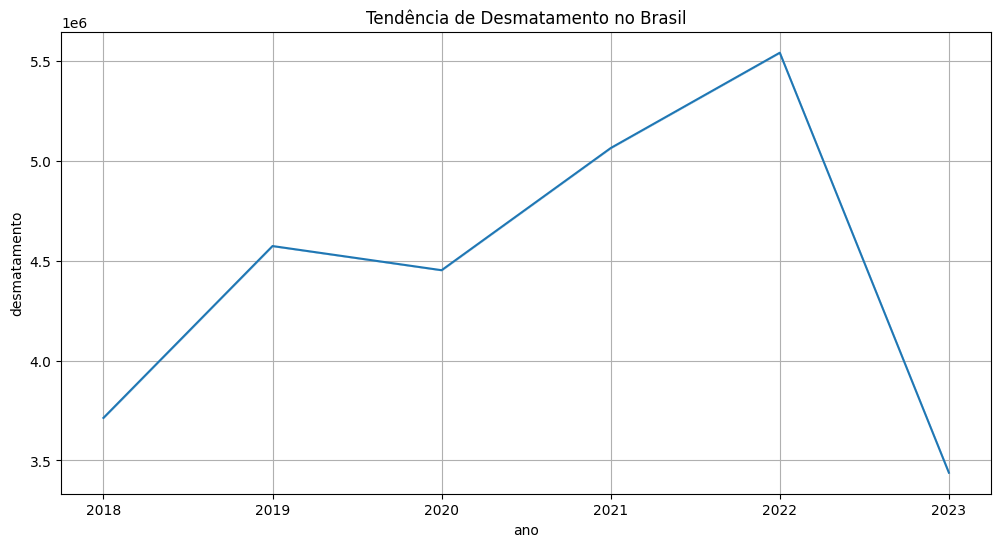

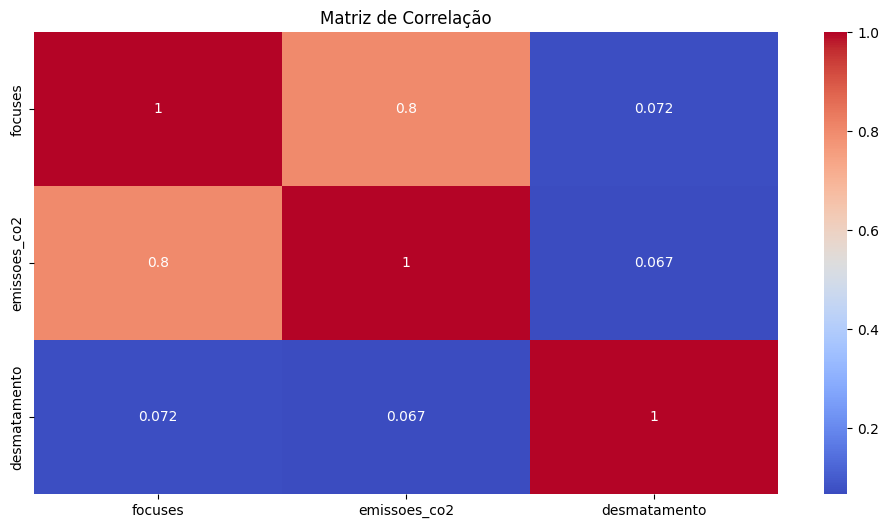

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tendência de focos de queimada por estado
plt.figure(figsize=(12, 6))
sns.lineplot(data=dados_combinados, x='ano', y='focuses', hue='uf', palette='tab10')
plt.title('Tendência de Focos de Queimada por Estado')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Tendência de emissões de CO2 por estado
plt.figure(figsize=(12, 6))
sns.lineplot(data=dados_combinados, x='ano', y='emissoes_co2', hue='uf', palette='tab10')
plt.title('Tendência de Emissões de CO2 por Estado')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Tendência de desmatamento a nível nacional
plt.figure(figsize=(12, 6))
sns.lineplot(data=dados_combinados, x='ano', y='desmatamento')
plt.title('Tendência de Desmatamento no Brasil')
plt.grid(True)
plt.show()

# Correlação entre variáveis
correlation_matrix = dados_combinados[['focuses', 'emissoes_co2', 'desmatamento']].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação')
plt.show()

## Modelagem Preditiva

### Por estados
A predição não se produz correta, pois o desmatamento não está por estados

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Definir variáveis de entrada e saída
X = dados_combinados[['focuses', 'desmatamento']]
y = dados_combinados['emissoes_co2']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo Random Forest
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Melhor modelo
best_rf = grid_search.best_estimator_

# Fazer previsões
y_pred = best_rf.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R²: {r2}')

MSE: 2414926835071756.0, R²: 0.6523928543845463


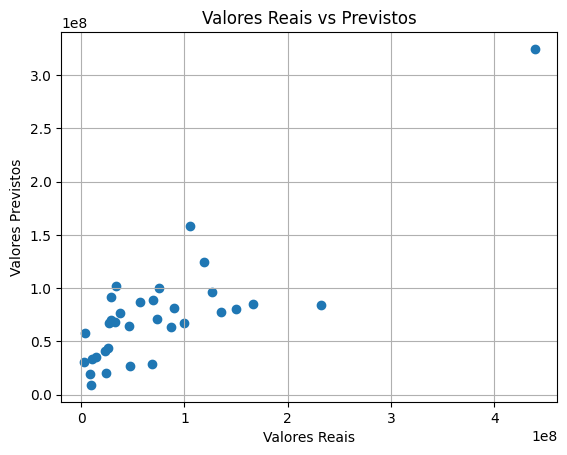

In [68]:
# Plotar valores reais vs previstos
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs Previstos')
plt.grid(True)
plt.show()

In [69]:
# Calcular a tendência anual média de desmatamento
tendencia_desmatamento = dados_combinados['desmatamento'].diff().mean()

# Calcular a tendência anual média de focos de queimada
tendencia_focos_queimada = dados_combinados['focuses'].diff().mean()

print(f"Tendência anual de desmatamento: {tendencia_desmatamento}")
print(f"Tendência anual de focos de queimada: {tendencia_focos_queimada}")

Tendência anual de desmatamento: -1705.2111801242236
Tendência anual de focos de queimada: 21.490683229813666


In [73]:
# Projetar valores futuros de desmatamento e focos de queimada
anos_futuros = list(range(2024, 2034))  # Anos de 2024 a 2033

# Últimos valores conhecidos
ultimo_desmatamento = dados_combinados['desmatamento'].iloc[-1]
ultimo_focos_queimada = dados_combinados['focuses'].iloc[-1]

# Projeções
projeções_desmatamento = [ultimo_desmatamento + tendencia_desmatamento * i for i in range(len(anos_futuros))]
projeções_focos_queimada = [ultimo_focos_queimada + tendencia_focos_queimada * i for i in range(len(anos_futuros))]

# Criar DataFrame com as projeções
dados_futuros = pd.DataFrame({
    'focuses': projeções_focos_queimada,
    'desmatamento': projeções_desmatamento
})

print(dados_futuros)

       focuses  desmatamento
0  9641.000000  3.438677e+06
1  9662.490683  3.436972e+06
2  9683.981366  3.435267e+06
3  9705.472050  3.433561e+06
4  9726.962733  3.431856e+06
5  9748.453416  3.430151e+06
6  9769.944099  3.428446e+06
7  9791.434783  3.426741e+06
8  9812.925466  3.425035e+06
9  9834.416149  3.423330e+06


In [75]:
# Fazer previsões para os próximos 10 anos
previsoes_futuras = best_rf.predict(dados_futuros)

# Mostrar as previsões
for ano, previsao in zip(anos_futuros, previsoes_futuras):
    print(f"Previsão de emissões de CO2 para {ano}: {previsao:.2f}")

Previsão de emissões de CO2 para 2024: 89591120.27
Previsão de emissões de CO2 para 2025: 89591120.27
Previsão de emissões de CO2 para 2026: 89591120.27
Previsão de emissões de CO2 para 2027: 90220164.22
Previsão de emissões de CO2 para 2028: 90220164.22
Previsão de emissões de CO2 para 2029: 91197968.61
Previsão de emissões de CO2 para 2030: 91197968.61
Previsão de emissões de CO2 para 2031: 91197968.61
Previsão de emissões de CO2 para 2032: 91197968.61
Previsão de emissões de CO2 para 2033: 92176894.97


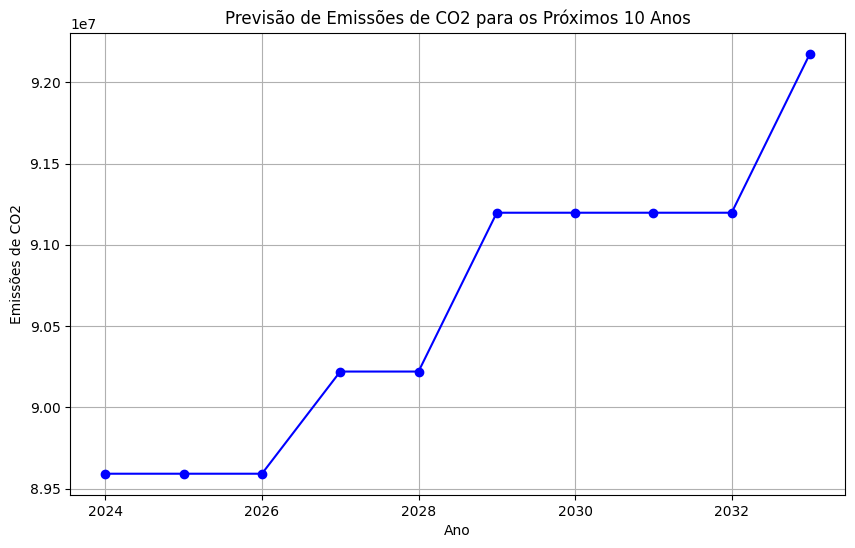

In [76]:
# Plotar previsões futuras
plt.figure(figsize=(10, 6))
plt.plot(anos_futuros, previsoes_futuras, marker='o', color='blue')
plt.title('Previsão de Emissões de CO2 para os Próximos 10 Anos')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2')
plt.grid(True)
plt.show()

### Nível nacional
Predição funcionou, porém estagnada por ter poucos anos de dados

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Definir variáveis de entrada e saída
X = dados_combinados_nacional[['desmatamento', 'focuses']]
y = dados_combinados_nacional['emissoes_co2']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None, min_samples_split=2)
rf.fit(X_train, y_train)

# Fazer previsões
y_pred = rf.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R²: {r2}')

MSE: 5.580953995618634e+16, R²: -1.299336023414718


Previsão de emissões de CO2 para 2024: 2260203135.86
Previsão de emissões de CO2 para 2025: 2257294829.59
Previsão de emissões de CO2 para 2026: 2234284000.37
Previsão de emissões de CO2 para 2027: 2234284000.37
Previsão de emissões de CO2 para 2028: 2234284000.37
Previsão de emissões de CO2 para 2029: 2234284000.37
Previsão de emissões de CO2 para 2030: 2234284000.37
Previsão de emissões de CO2 para 2031: 2234284000.37
Previsão de emissões de CO2 para 2032: 2234284000.37
Previsão de emissões de CO2 para 2033: 2234284000.37


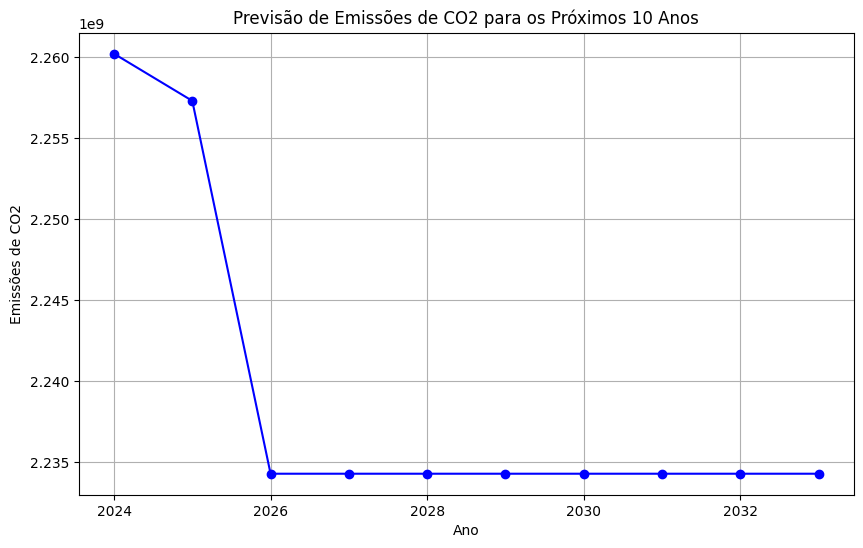

In [95]:
# Últimos valores conhecidos
ultimo_desmatamento = dados_combinados_nacional['desmatamento'].iloc[-1]
ultimo_focos_queimada = dados_combinados_nacional['focuses'].iloc[-1]

# Tendências anuais médias
tendencia_desmatamento = dados_combinados_nacional['desmatamento'].diff().mean()
tendencia_focos_queimada = dados_combinados_nacional['focuses'].diff().mean()

# Projetar valores futuros
anos_futuros = list(range(2024, 2034))
projeções_desmatamento = [ultimo_desmatamento + tendencia_desmatamento * i for i in range(len(anos_futuros))]
projeções_focos_queimada = [ultimo_focos_queimada + tendencia_focos_queimada * i for i in range(len(anos_futuros))]

# Criar DataFrame com as projeções
dados_futuros = pd.DataFrame({
    'desmatamento': projeções_desmatamento,
    'focuses': projeções_focos_queimada
})

# Fazer previsões para os próximos 10 anos
previsoes_futuras = best_rf.predict(dados_futuros)

# Mostrar as previsões
for ano, previsao in zip(anos_futuros, previsoes_futuras):
    print(f"Previsão de emissões de CO2 para {ano}: {previsao:.2f}")

# Plotar previsões futuras
plt.figure(figsize=(10, 6))
plt.plot(anos_futuros, previsoes_futuras, marker='o', color='blue')
plt.title('Previsão de Emissões de CO2 para os Próximos 10 Anos')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2')
plt.grid(True)
plt.show()

### Previsão iterativa (shifting)
Também não funcionou, os algoritmos para treinos não estão se adaptando aos valores de entrada

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Definir variáveis de entrada e saída
X = dados_combinados_nacional[['focuses', 'desmatamento']]
y = dados_combinados_nacional['emissoes_co2']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir grade de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Usar GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Melhor modelo
best_rf = grid_search.best_estimator_

# Avaliar o modelo
y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f'MSE (Melhor RF): {mse_best_rf}, R²: {r2_best_rf}')

MSE (Melhor RF): 5.370561728208155e+16, R²: -1.2126550509708318


In [162]:
# Calcular tendências históricas
tendencia_focuses = dados_combinados_nacional['focuses'].diff().mean()
tendencia_desmatamento = dados_combinados_nacional['desmatamento'].diff().mean()

# Últimos valores conhecidos
ultimo_focuses = dados_combinados_nacional['focuses'].iloc[-1]
ultimo_desmatamento = dados_combinados_nacional['desmatamento'].iloc[-1]

# Projetar valores futuros
anos_futuros = list(range(2024, 2034))
projeções_focuses = [ultimo_focuses + tendencia_focuses * i for i in range(len(anos_futuros))]
projeções_desmatamento = [ultimo_desmatamento + tendencia_desmatamento * i for i in range(len(anos_futuros))]

# Criar DataFrame com as projeções
dados_futuros = pd.DataFrame({
    'focuses': projeções_focuses,
    'desmatamento': projeções_desmatamento
})

print(dados_futuros)

    focuses  desmatamento
0  189892.0     3438677.0
1  207327.4     3383769.2
2  224762.8     3328861.4
3  242198.2     3273953.6
4  259633.6     3219045.8
5  277069.0     3164138.0
6  294504.4     3109230.2
7  311939.8     3054322.4
8  329375.2     2999414.6
9  346810.6     2944506.8


Previsão de emissões de CO2 para 2024: 2258395991.70
Previsão de emissões de CO2 para 2025: 2261612532.65
Previsão de emissões de CO2 para 2026: 2244070265.10
Previsão de emissões de CO2 para 2027: 2244070265.10
Previsão de emissões de CO2 para 2028: 2244070265.10
Previsão de emissões de CO2 para 2029: 2244070265.10
Previsão de emissões de CO2 para 2030: 2244070265.10
Previsão de emissões de CO2 para 2031: 2244070265.10
Previsão de emissões de CO2 para 2032: 2244070265.10
Previsão de emissões de CO2 para 2033: 2244070265.10


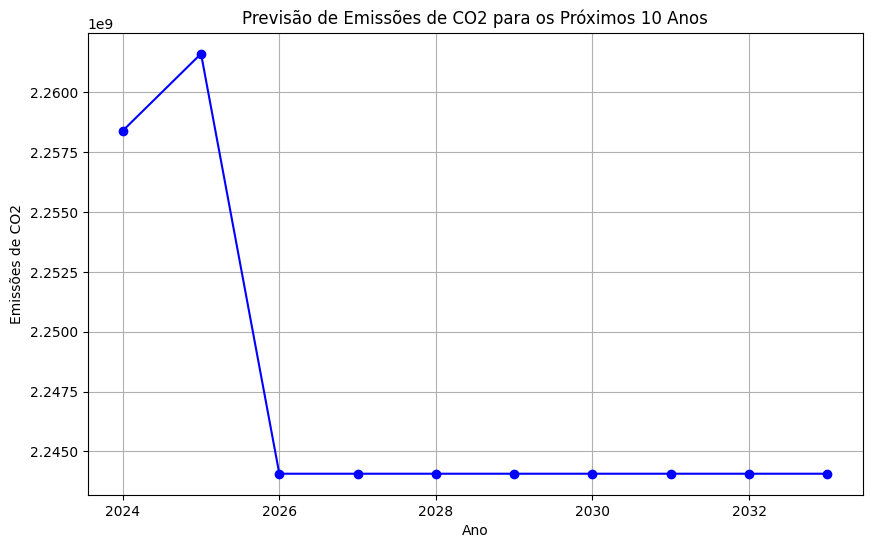

In [163]:
# Certificar que as colunas estão na mesma ordem que X_train
dados_futuros = dados_futuros[X_train.columns]

# Fazer previsões para os próximos 10 anos
previsoes_futuras = rf.predict(dados_futuros)

# Mostrar as previsões
for ano, previsao in zip(anos_futuros, previsoes_futuras):
    print(f"Previsão de emissões de CO2 para {ano}: {previsao:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(anos_futuros, previsoes_futuras, marker='o', color='blue')
plt.title('Previsão de Emissões de CO2 para os Próximos 10 Anos')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2')
plt.grid(True)
plt.show()

### Normalização das variáveis e aplicando o modelo de predição
Variação mínima entre os anos

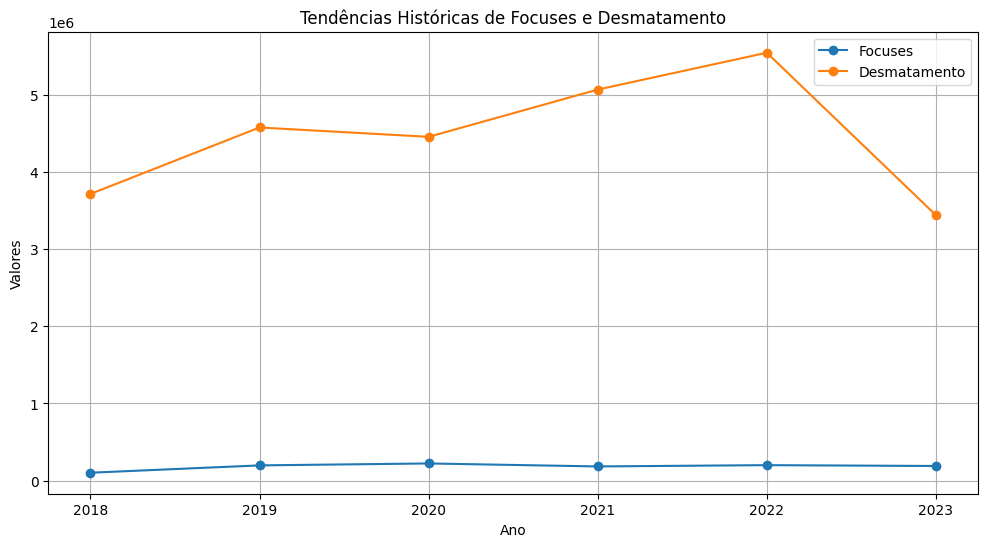

In [166]:
# Visualizar tendências históricas
plt.figure(figsize=(12, 6))
plt.plot(dados_combinados_nacional['ano'], dados_combinados_nacional['focuses'], label='Focuses', marker='o')
plt.plot(dados_combinados_nacional['ano'], dados_combinados_nacional['desmatamento'], label='Desmatamento', marker='o')
plt.title('Tendências Históricas de Focuses e Desmatamento')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

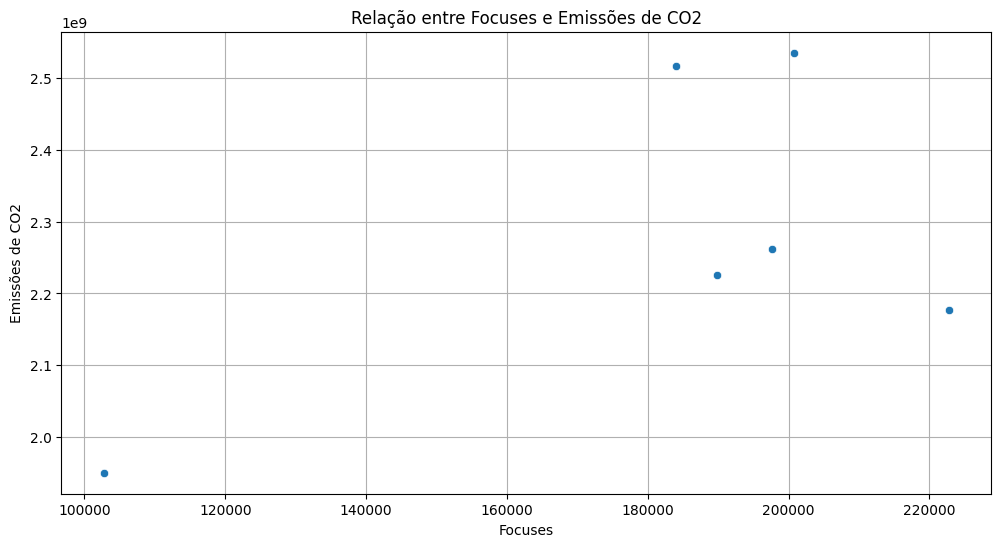

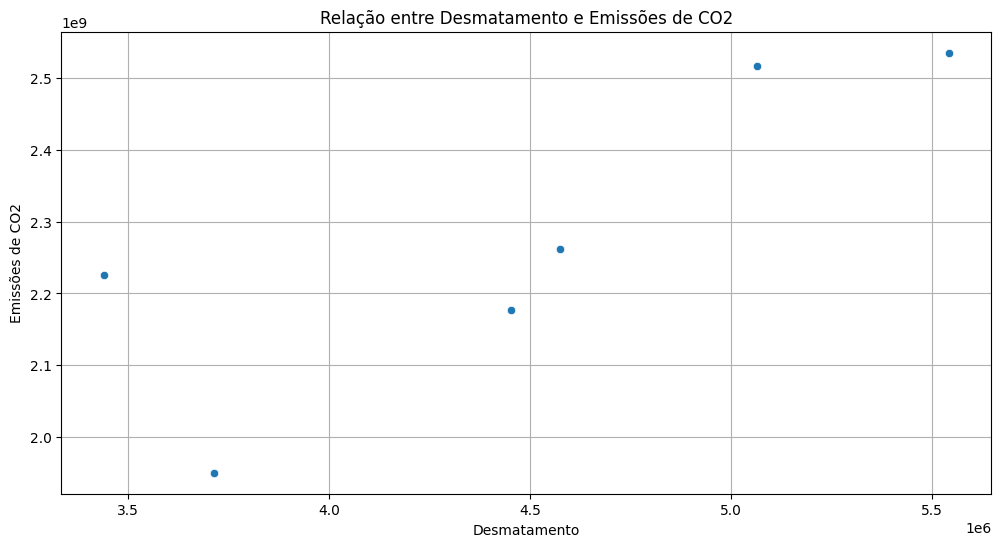

In [173]:
import seaborn as sns

# Gráfico de dispersão entre focuses e emissões de CO2
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dados_combinados_nacional, x='focuses', y='emissoes_co2')
plt.title('Relação entre Focuses e Emissões de CO2')
plt.xlabel('Focuses')
plt.ylabel('Emissões de CO2')
plt.grid(True)
plt.show()

# Gráfico de dispersão entre desmatamento e emissões de CO2
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dados_combinados_nacional, x='desmatamento', y='emissoes_co2')
plt.title('Relação entre Desmatamento e Emissões de CO2')
plt.xlabel('Desmatamento')
plt.ylabel('Emissões de CO2')
plt.grid(True)
plt.show()

In [167]:
from sklearn.preprocessing import StandardScaler

# Criar o scaler
scaler = StandardScaler()

# Aplicar a padronização nas variáveis preditoras
X_scaled = scaler.fit_transform(dados_combinados_nacional[['focuses', 'desmatamento']])

# Criar um DataFrame com os dados padronizados
X_scaled_df = pd.DataFrame(X_scaled, columns=['focuses', 'desmatamento'])

# Visualizar os dados padronizados
print(X_scaled_df)

    focuses  desmatamento
0 -2.119164     -1.036498
1  0.386765      0.151356
2  1.051172     -0.015629
3  0.029054      0.828608
4  0.469413      1.487516
5  0.182759     -1.415353


In [175]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, dados_combinados_nacional['emissoes_co2'], test_size=0.2, random_state=42)

# Treinar um modelo Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R²: {r2}')

MSE: 5.370561728208155e+16, R²: -1.2126550509708318


Previsão de emissões de CO2 para 2024: 2258395991.70
Previsão de emissões de CO2 para 2025: 2258395991.70
Previsão de emissões de CO2 para 2026: 2259331816.26
Previsão de emissões de CO2 para 2027: 2274800468.35
Previsão de emissões de CO2 para 2028: 2274800468.35
Previsão de emissões de CO2 para 2029: 2274800468.35
Previsão de emissões de CO2 para 2030: 2274800468.35
Previsão de emissões de CO2 para 2031: 2261612532.65
Previsão de emissões de CO2 para 2032: 2261612532.65
Previsão de emissões de CO2 para 2033: 2251820751.52


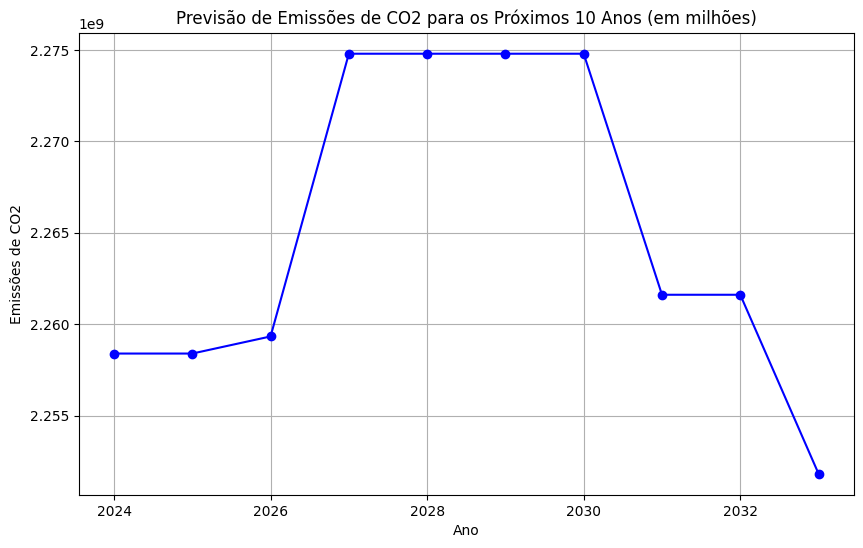

In [180]:
# Últimos valores conhecidos
ultimo_focuses = dados_combinados_nacional['focuses'].iloc[-1]
ultimo_desmatamento = dados_combinados_nacional['desmatamento'].iloc[-1]

# Projetar valores futuros com crescimento exponencial
anos_futuros = list(range(2024, 2034))
projeções_focuses = [ultimo_focuses * (1 + 0.01) ** i for i in range(len(anos_futuros))]  # Crescimento de 1% ao ano
projeções_desmatamento = [ultimo_desmatamento * (1 + 0.02) ** i for i in range(len(anos_futuros))]  # Crescimento de 2% ao ano

# Criar DataFrame com as projeções
dados_futuros = pd.DataFrame({
    'focuses': projeções_focuses,
    'desmatamento': projeções_desmatamento
})

# Padronizar os dados futuros usando o mesmo scaler
dados_futuros_scaled = scaler.transform(dados_futuros)

# Certificar que as colunas estão na mesma ordem que X_train
dados_futuros_scaled_df = pd.DataFrame(dados_futuros_scaled, columns=['focuses', 'desmatamento'])

# Fazer previsões para os próximos 10 anos
previsoes_futuras = rf.predict(dados_futuros_scaled_df)

# Mostrar as previsões
for ano, previsao in zip(anos_futuros, previsoes_futuras):
    print(f"Previsão de emissões de CO2 para {ano}: {previsao:.2f}")

# Plotar previsões futuras
plt.figure(figsize=(10, 6))
plt.plot(anos_futuros, previsoes_futuras, marker='o', color='blue')
plt.title('Previsão de Emissões de CO2 para os Próximos 10 Anos (em milhões)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2')
plt.grid(True)
plt.show()

### Conclusão

Não consegui aplicar o modelo preditivo em cima da minha base de dados. Na reunião de segunda-feira irei conversar e pedir sugestões do que pode ser feito para a Professora.